# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date
import holidays

# Fetching Data

In [2]:
def date(s_date,e_date):
  try:
      start_date = datetime.datetime.strptime(s_date, "%Y-%m-%d").date()
      end_date = datetime.datetime.strptime(e_date, "%Y-%m-%d").date()
  except ValueError:
      print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")

  x=yf.download('AAPL', start= start_date, end=end_date)
  return x

In [3]:
s_date = input("Enter a start date (YYYY-MM-DD): ")
e_date = input("Enter a end date (YYYY-MM-DD): ")
df=date(s_date,e_date)
df

Enter a start date (YYYY-MM-DD): 2014-1-1
Enter a end date (YYYY-MM-DD): 2024-1-1


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318735,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938307,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030672,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015961,258529600
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


# Fetching Close Feature

In [4]:
df.isnull().sum()  #checking null values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data=df.filter(['Close'])
data

,Close
Date,
2014-01-02,19.754642
2014-01-03,19.320715
2014-01-06,19.426071
2014-01-07,19.287144
2014-01-08,19.409286
...,...
2023-12-22,193.600006
2023-12-26,193.050003
2023-12-27,193.149994


# Converting to array

In [6]:
dataset=data.values
dataset.shape

(2516, 1)

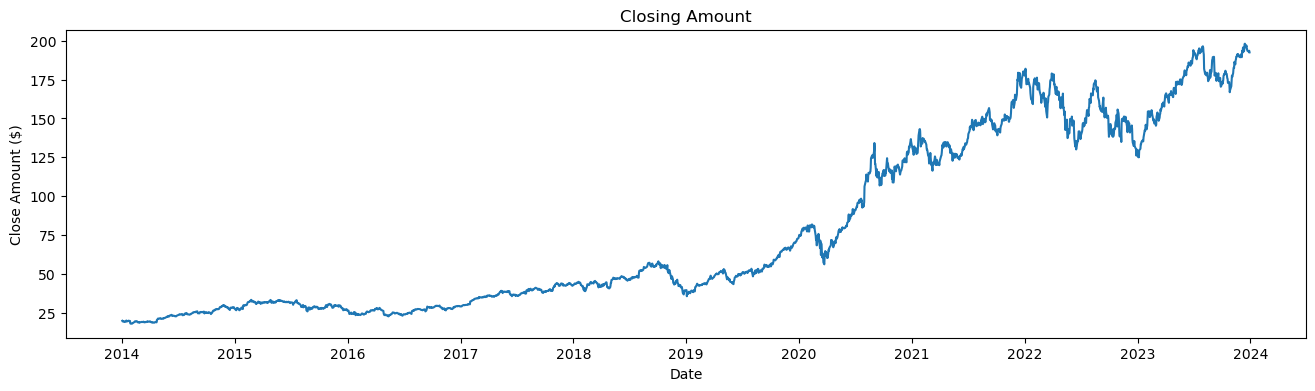

In [7]:
plt.figure(figsize=(16,4))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Close Amount ($)')
plt.title('Closing Amount')
plt.show()

# Scaling the Data

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

# Splitting data in train/test

In [9]:
train_size=math.ceil(len(data)*0.8)
test_size=len(data)-train_size
train_size,test_size

(2013, 503)

# Train Data

In [10]:
train_data=scaled_data[:train_size,:]
x_train,y_train=[],[]
for i in range(100,len(train_data)):
  x_train.append(train_data[i-100:i,0])
  y_train.append(train_data[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape,y_train.shape

((1913, 100), (1913,))

# Test Data

In [11]:
test_data=scaled_data[train_size-100:,:]
x_test=[]
y_test=dataset[train_size:,0]
for i in range(100,len(test_data)):
  x_test.append(test_data[i-100:i,0])
x_test=np.array(x_test)
x_test.shape,y_test.shape

((503, 100), (503,))

# Reshape the data

In [12]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train.shape,x_test.shape

((1913, 100, 1), (503, 100, 1))

# LSTM Model

In [13]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 126301 (493.36 KB)
Trainable params: 126

In [14]:
model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100

30/30 [==============================] - 14s 344ms/step - loss: 0.0086
Epoch 2/100
30/30 [==============================] - 8s 263ms/step - loss: 0.0019
Epoch 3/100
30/30 [==============================] - 8s 282ms/step - loss: 0.0014
Epoch 4/100
30/30 [==============================] - 8s 253ms/step - loss: 0.0015
Epoch 5/100
30/30 [==============================] - 9s 318ms/step - loss: 0.0014
Epoch 6/100
30/30 [==============================] - 7s 228ms/step - loss: 0.0013
Epoch 7/100
30/30 [==============================] - 10s 321ms/step - loss: 0.0011
Epoch 8/100
30/30 [==============================] - 7s 215ms/step - loss: 0.0011
Epoch 9/100
30/30 [==============================] - 10s 331ms/step - loss: 0.0011
Epoch 10/100
30/30 [==============================] - 7s 230ms/step - loss: 0.0010
Epoch 11/100
30/30 [==============================] - 10s 344ms/step - loss: 8.7514e-04
Epoch 12/100
30/30 [==============================] - 6s 206ms/step - loss: 9.8083e-04


In [15]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

16/16 [==============================] - 0s 30ms/step


In [16]:
train_prediction=scaler.inverse_transform(train_predict)
test_prediction=scaler.inverse_transform(test_predict)

# Performace of Model

In [17]:
mean_absolute_error(y_test,test_prediction)

3.217177540834097

In [18]:
np.sqrt(mean_squared_error(y_test,test_prediction))

3.952728647807606

C:\Users\sande\AppData\Local\Temp\ipykernel_11628\1632395826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=test_prediction


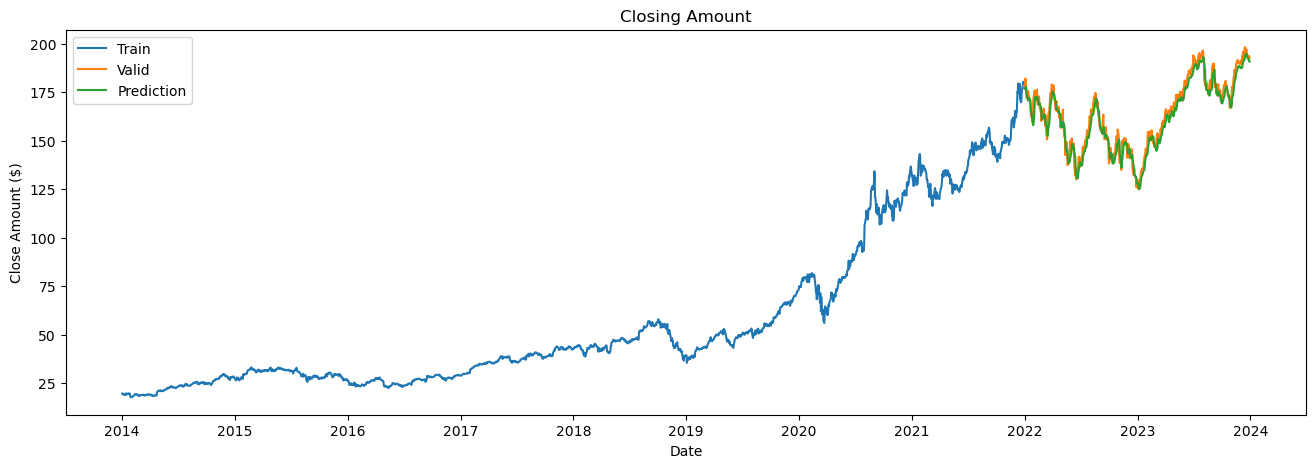

In [19]:
plt.figure(figsize=(16,5))
train=data[:train_size]
valid=data[train_size:]
valid['Prediction']=test_prediction
plt.plot(train)
plt.plot(valid[['Close','Prediction']])
plt.xlabel('Date')
plt.ylabel('Close Amount ($)')
plt.title('Closing Amount')
plt.legend(['Train','Valid','Prediction'],loc='best')
plt.show()

In [20]:
valid

,Close,Prediction
Date,,
2021-12-30,178.199997,176.972595
2021-12-31,177.570007,176.861115
2022-01-03,182.009995,176.352692
2022-01-04,179.699997,177.480011
2022-01-05,174.919998,177.737625
...,...,...
2023-12-22,193.600006,192.769531
2023-12-26,193.050003,191.947647
2023-12-27,193.149994,191.200195


# Prediction for next 50 days

In [21]:
print(len(test_data))
x_input=test_data[503:].reshape(1,-1)
x_input.shape

603


(1, 100)

In [22]:
temp_input=x_input.tolist()[0]
temp_input

[0.889493403399672,
 0.8882729421354876,
 0.8872743444427715,
 0.8965387780341096,
 0.8853882078157389,
 0.8805064474074455,
 0.866249279297858,
 0.8689675947768947,
 0.8764566965542686,
 0.8841677465515547,
 0.9057475975978042,
 0.8794524049839734,
 0.8918233518180845,
 0.9005884442388428,
 0.9223901588565604,
 0.9419728991658214,
 0.9431933604300056,
 0.9520139822299638,
 0.9533453329556603,
 0.9156777065519905,
 0.885998438447831,
 0.889437874020472,
 0.8959839921327737,
 0.8790085931925933,
 0.8674142958312863,
 0.8759019953013765,
 0.8718522444481995,
 0.8882729421354876,
 0.8943752484564091,
 0.8745151151964801,
 0.865860912237234,
 0.8706317831840151,
 0.8777881319284089,
 0.8549323748872191,
 0.8464445907686851,
 0.8478870002527814,
 0.8507717345725301,
 0.8648623991929618,
 0.8573732127671438,
 0.8643631426708256,
 0.8712975431953074,
 0.8856101560356509,
 0.8939314366650291,
 0.8906028905539003,
 0.8984249146611423,
 0.9034731785585914,
 0.8931547871922247,
 0.892433582450176

In [23]:
len(temp_input)

100

In [24]:
time_step=100
n=50
i=0
out=[]
while i<n:
  if len(temp_input)>time_step:
    x_input=np.array(temp_input[1:])
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape(x_input.shape[0],time_step,1)
    y_pred=model.predict(x_input)
    temp_input.extend(y_pred[0].tolist())
    temp_input=temp_input[1:]
    out.extend(y_pred.tolist())
    i=i+1
  else:
    x_input=x_input.reshape(x_input.shape[0],time_step,1)
    y_pred=model.predict(x_input)
    temp_input.extend(y_pred[0].tolist())
    out.extend(y_pred.tolist())
    i=i+1
out

1/1 [==============================] - 0s 28ms/step


[[0.9574044942855835],
 [0.9519627690315247],
 [0.94573575258255],
 [0.9393271803855896],
 [0.9329082369804382],
 [0.9265390634536743],
 [0.9202455282211304],
 [0.9140401482582092],
 [0.9079287052154541],
 [0.9019123911857605],
 [0.8959903120994568],
 [0.8901602625846863],
 [0.8844181895256042],
 [0.8787606358528137],
 [0.873184084892273],
 [0.8676847815513611],
 [0.8622598648071289],
 [0.856905996799469],
 [0.8516210317611694],
 [0.8464021682739258],
 [0.8412473201751709],
 [0.8361549377441406],
 [0.8311226963996887],
 [0.826149582862854],
 [0.8212339282035828],
 [0.8163744211196899],
 [0.8115696907043457],
 [0.8068188428878784],
 [0.802120566368103],
 [0.7974739670753479],
 [0.7928778529167175],
 [0.7883313894271851],
 [0.7838335037231445],
 [0.7793834209442139],
 [0.7749803066253662],
 [0.7706232666969299],
 [0.766311526298523],
 [0.7620441317558289],
 [0.7578204274177551],
 [0.7536398768424988],
 [0.7495012283325195],
 [0.745404064655304],
 [0.7413477897644043],
 [0.737331569194793

In [25]:
next_prediction=scaler.inverse_transform(out)

# Predicting for next 50 days

In [26]:
def next_date(s_date,e_date):
    try:
        start_date = datetime.datetime.strptime(s_date, "%Y-%m-%d").date()  
        end_date = datetime.datetime.strptime(e_date, "%Y-%m-%d").date()
        x=[ptr for ptr in holidays.India(years = 2024)]                      # Fetching Bank holidays
        delta = end_date - start_date
        y=[start_date + datetime.timedelta(days=i) for i in range(delta.days + 1)]     # Range of days
        next_days=[i for i in y if ((i.weekday() in [0,1,2,3,4]) and (i not in x))]    # Remove weekends and bank holidays
        
    except ValueError:
        print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")

    return next_days

In [27]:
s_date = input("Enter a start date (YYYY-MM-DD): ")
e_date = input("Enter a end date (YYYY-MM-DD): ")
nextt_50=next_date(s_date,e_date)
nextt_50

Enter a start date (YYYY-MM-DD): 2024-1-2
Enter a end date (YYYY-MM-DD): 2024-3-12


[datetime.date(2024, 1, 2),
 datetime.date(2024, 1, 3),
 datetime.date(2024, 1, 4),
 datetime.date(2024, 1, 5),
 datetime.date(2024, 1, 8),
 datetime.date(2024, 1, 9),
 datetime.date(2024, 1, 10),
 datetime.date(2024, 1, 11),
 datetime.date(2024, 1, 12),
 datetime.date(2024, 1, 15),
 datetime.date(2024, 1, 16),
 datetime.date(2024, 1, 17),
 datetime.date(2024, 1, 18),
 datetime.date(2024, 1, 19),
 datetime.date(2024, 1, 22),
 datetime.date(2024, 1, 23),
 datetime.date(2024, 1, 24),
 datetime.date(2024, 1, 25),
 datetime.date(2024, 1, 29),
 datetime.date(2024, 1, 30),
 datetime.date(2024, 1, 31),
 datetime.date(2024, 2, 1),
 datetime.date(2024, 2, 2),
 datetime.date(2024, 2, 5),
 datetime.date(2024, 2, 6),
 datetime.date(2024, 2, 7),
 datetime.date(2024, 2, 8),
 datetime.date(2024, 2, 9),
 datetime.date(2024, 2, 12),
 datetime.date(2024, 2, 13),
 datetime.date(2024, 2, 14),
 datetime.date(2024, 2, 15),
 datetime.date(2024, 2, 16),
 datetime.date(2024, 2, 19),
 datetime.date(2024, 2, 20)

In [28]:
len(nextt_50)

50

# Plot Graph

In [29]:
next_prediction=[i.tolist()[0] for i in next_prediction]
next_50=pd.DataFrame({'Date':nextt_50,'Close':next_prediction})
next_50

,Date,Close
0,2024-01-02,190.431704
1,2024-01-03,189.450775
2,2024-01-04,188.328289
3,2024-01-05,187.173075
4,2024-01-08,186.015991
5,2024-01-09,184.867880
6,2024-01-10,183.733402
7,2024-01-11,182.614816
8,2024-01-12,181.513163
9,2024-01-15,180.428658


In [30]:
next_50=next_50.set_index('Date')
next_50.index=pd.to_datetime(next_50.index)
next_50

,Close
Date,
2024-01-02,190.431704
2024-01-03,189.450775
2024-01-04,188.328289
2024-01-05,187.173075
2024-01-08,186.015991
2024-01-09,184.867880
2024-01-10,183.733402
2024-01-11,182.614816
2024-01-12,181.513163


In [31]:
next_50.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2024-01-02 to 2024-03-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


C:\Users\sande\AppData\Local\Temp\ipykernel_11628\2641239472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=test_prediction


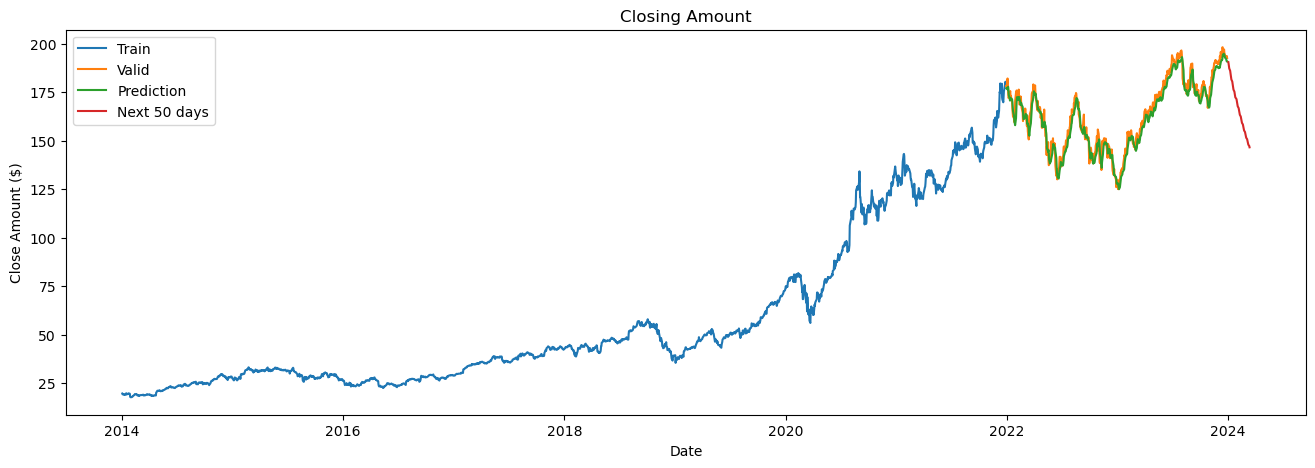

In [33]:
plt.figure(figsize=(16,5))
train=data[:train_size]
valid=data[train_size:]
valid['Prediction']=test_prediction
plt.plot(train)
plt.plot(valid[['Close','Prediction']])
plt.plot(next_50)
plt.xlabel('Date')
plt.ylabel('Close Amount ($)')
plt.title('Closing Amount')
plt.legend(['Train','Valid','Prediction','Next 50 days'],loc='best')
plt.show()

According to my prediction the closing amout will decrease in next 50 days...

# Interactive Graph

<IPython.core.display.Javascript object>


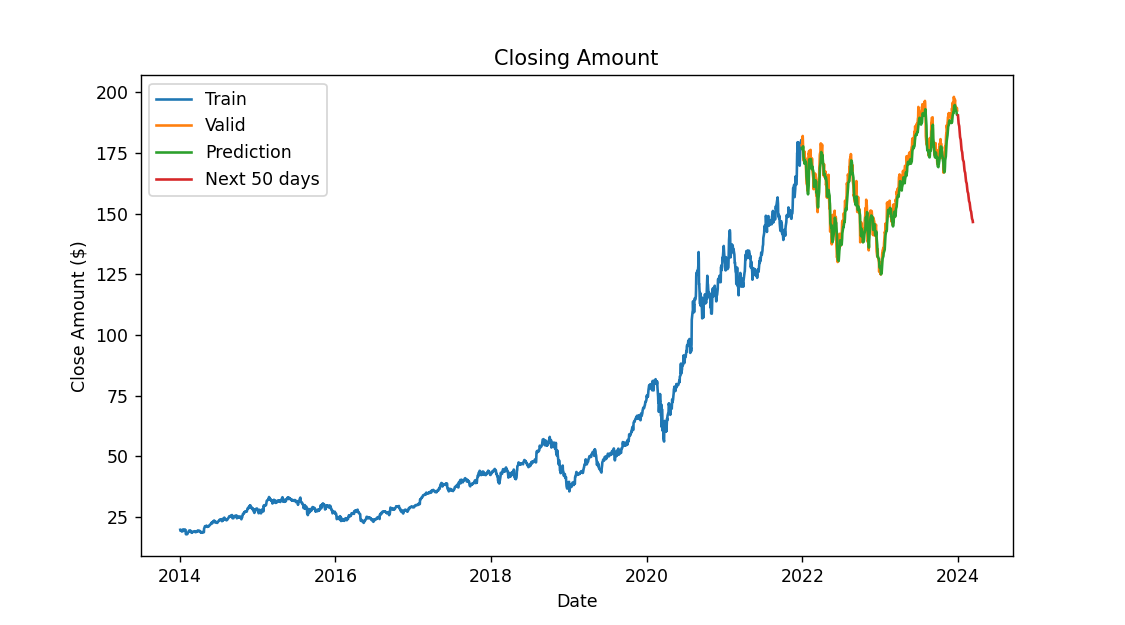

C:\Users\sande\AppData\Local\Temp\ipykernel_11628\2085746944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=test_prediction


In [34]:
%matplotlib notebook
plt.figure(figsize=(9,5))
train=data[:train_size]
valid=data[train_size:]
valid['Prediction']=test_prediction
plt.plot(train)
plt.plot(valid[['Close','Prediction']])
plt.plot(next_50)
plt.xlabel('Date')
plt.ylabel('Close Amount ($)')
plt.title('Closing Amount')
plt.legend(['Train','Valid','Prediction','Next 50 days'],loc='best')
plt.xticks(x=2024)
plt.show()